# Problem statement:
This dataset has 35 columns and 1470 rows. Our task is to analyze the dataset and predict the number of wins a baseball team will attain by developing a supervised machine learning model.

In [59]:
# Import all the required liabrary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.feature_selection import RFE

In [2]:
#Load HR Data Set
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Analyzing the data:
Let’s start analyzing the data provided. We need to know the number of columns, rows, null objects, etc. So, let’s open the data and start counting the columns, get the row count, go through each row to find out any special characters or null values in it, find out the data type of each column provided.



In [3]:
#check the shape of data
df.shape

(1470, 35)

In [4]:
#Check if any missing value present in data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

In [9]:
categorical_col =[]
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique())<=50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("=================================")
        

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [10]:
df['Attrition']=df.Attrition.astype('category').cat.codes

# Data Visualization:
Here we would try to find out a relation between each column of the final numerical dataset and the target attribute income. This can be achieved by creating a Bar graph between income and each of the other columns.

In [11]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

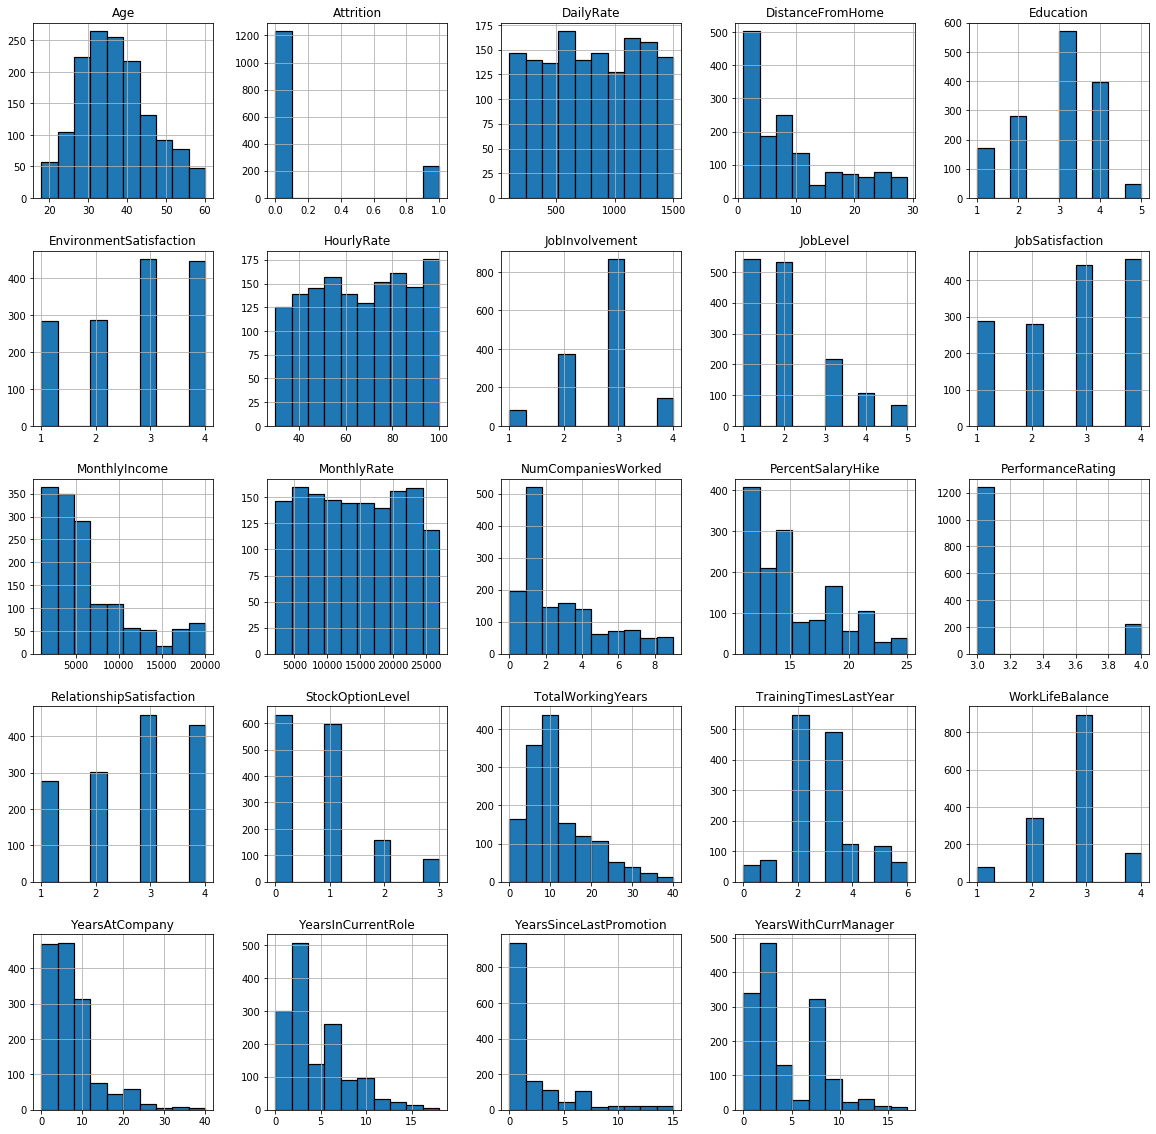

In [12]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

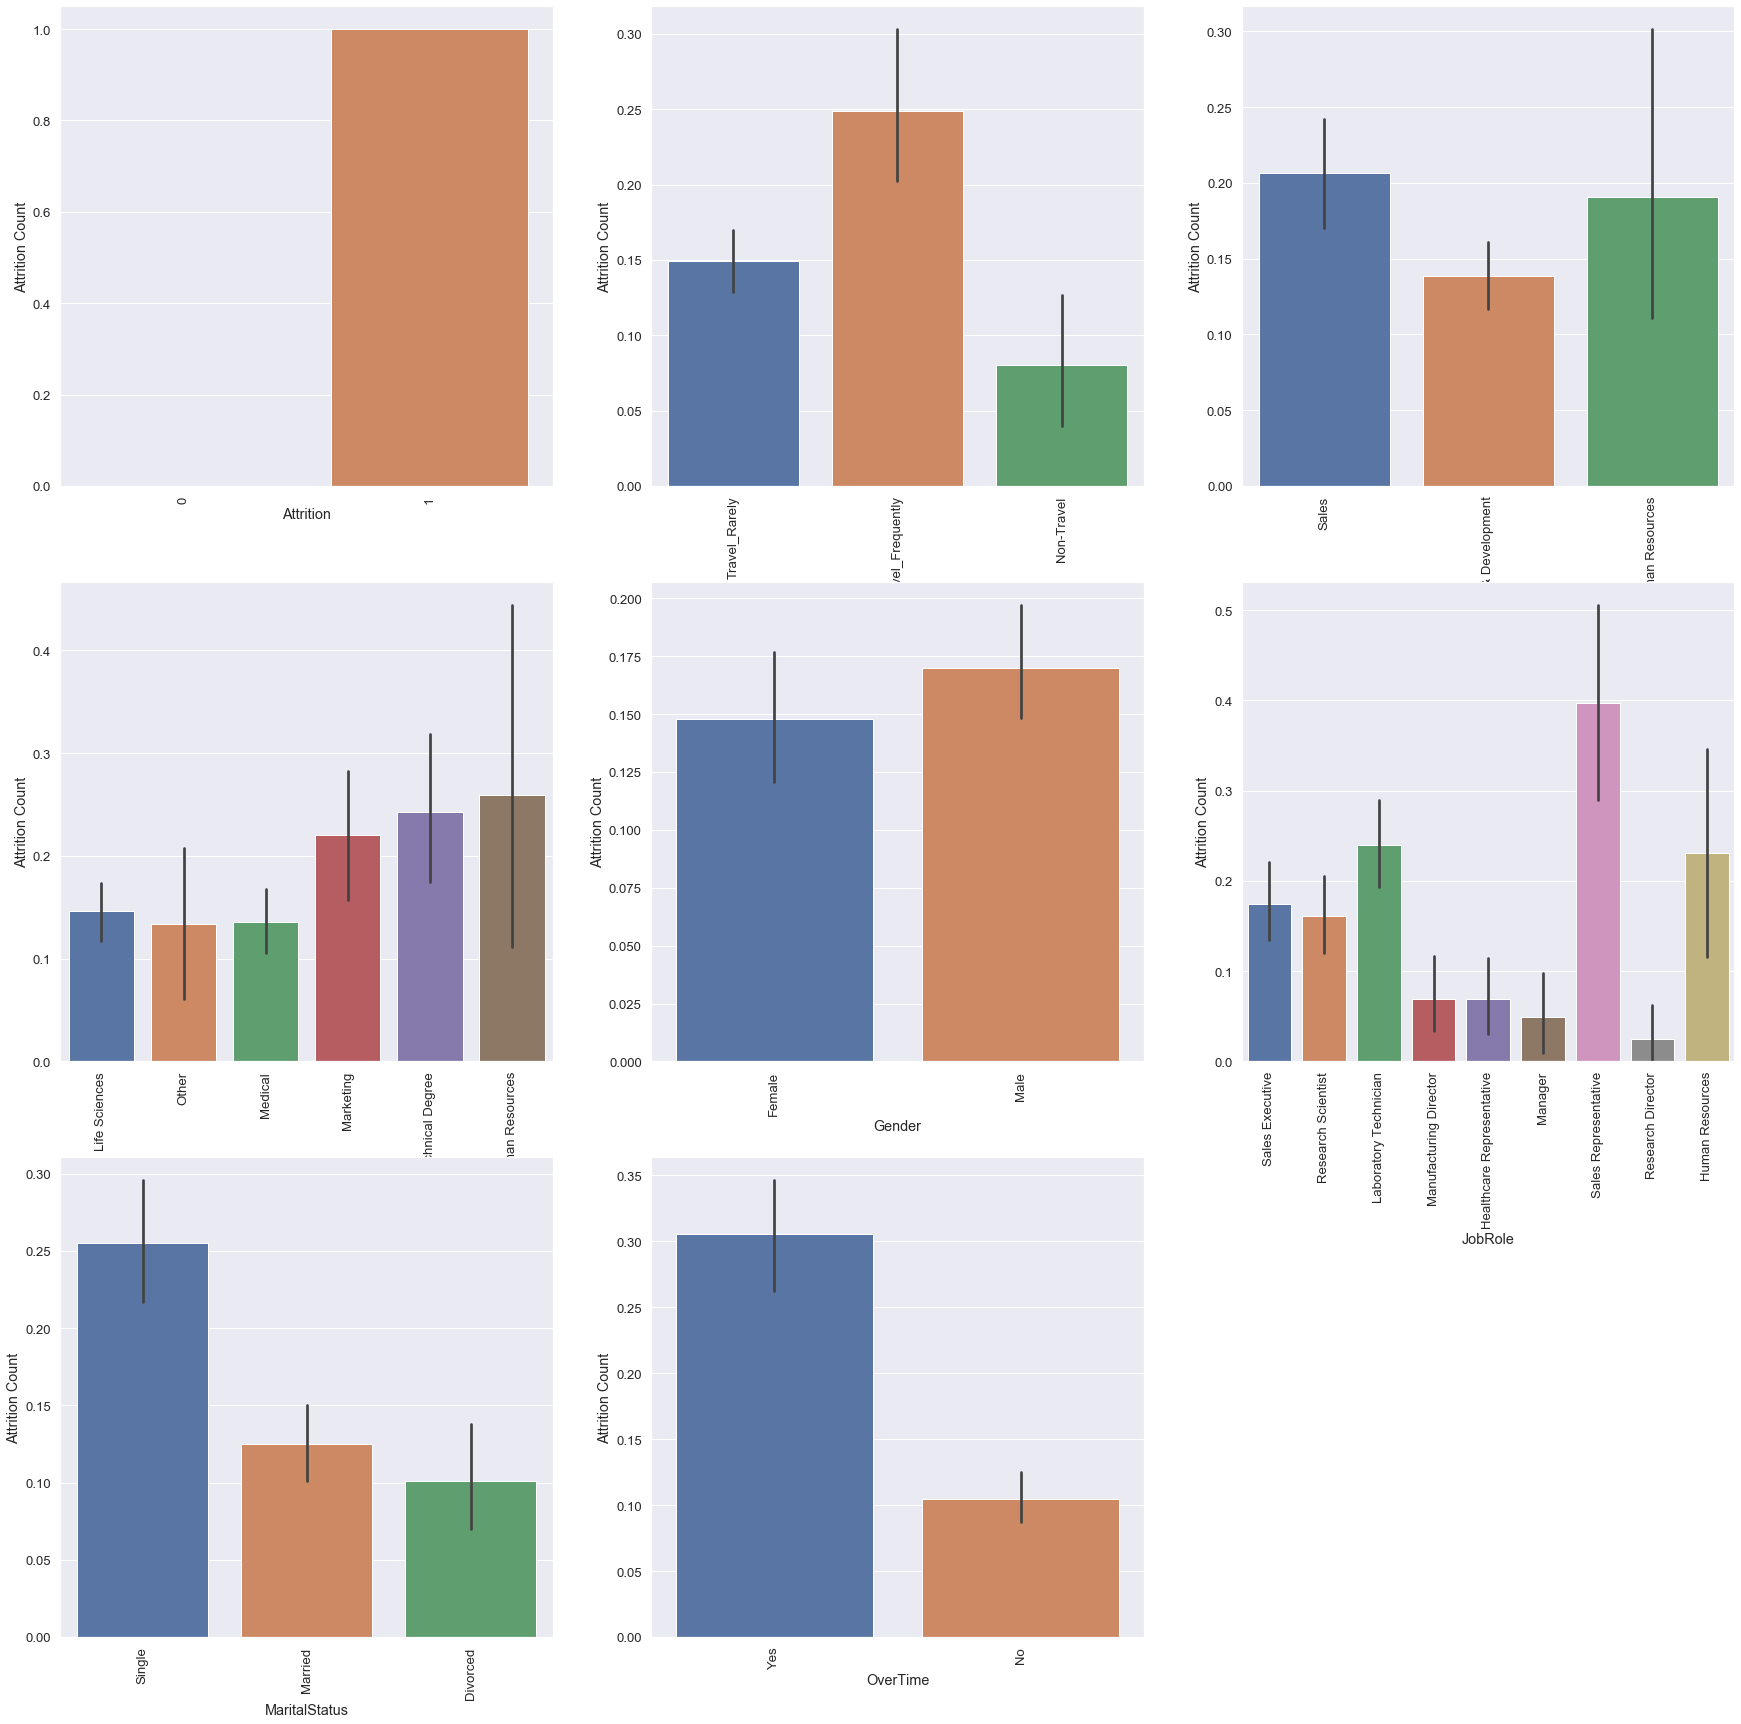

In [13]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

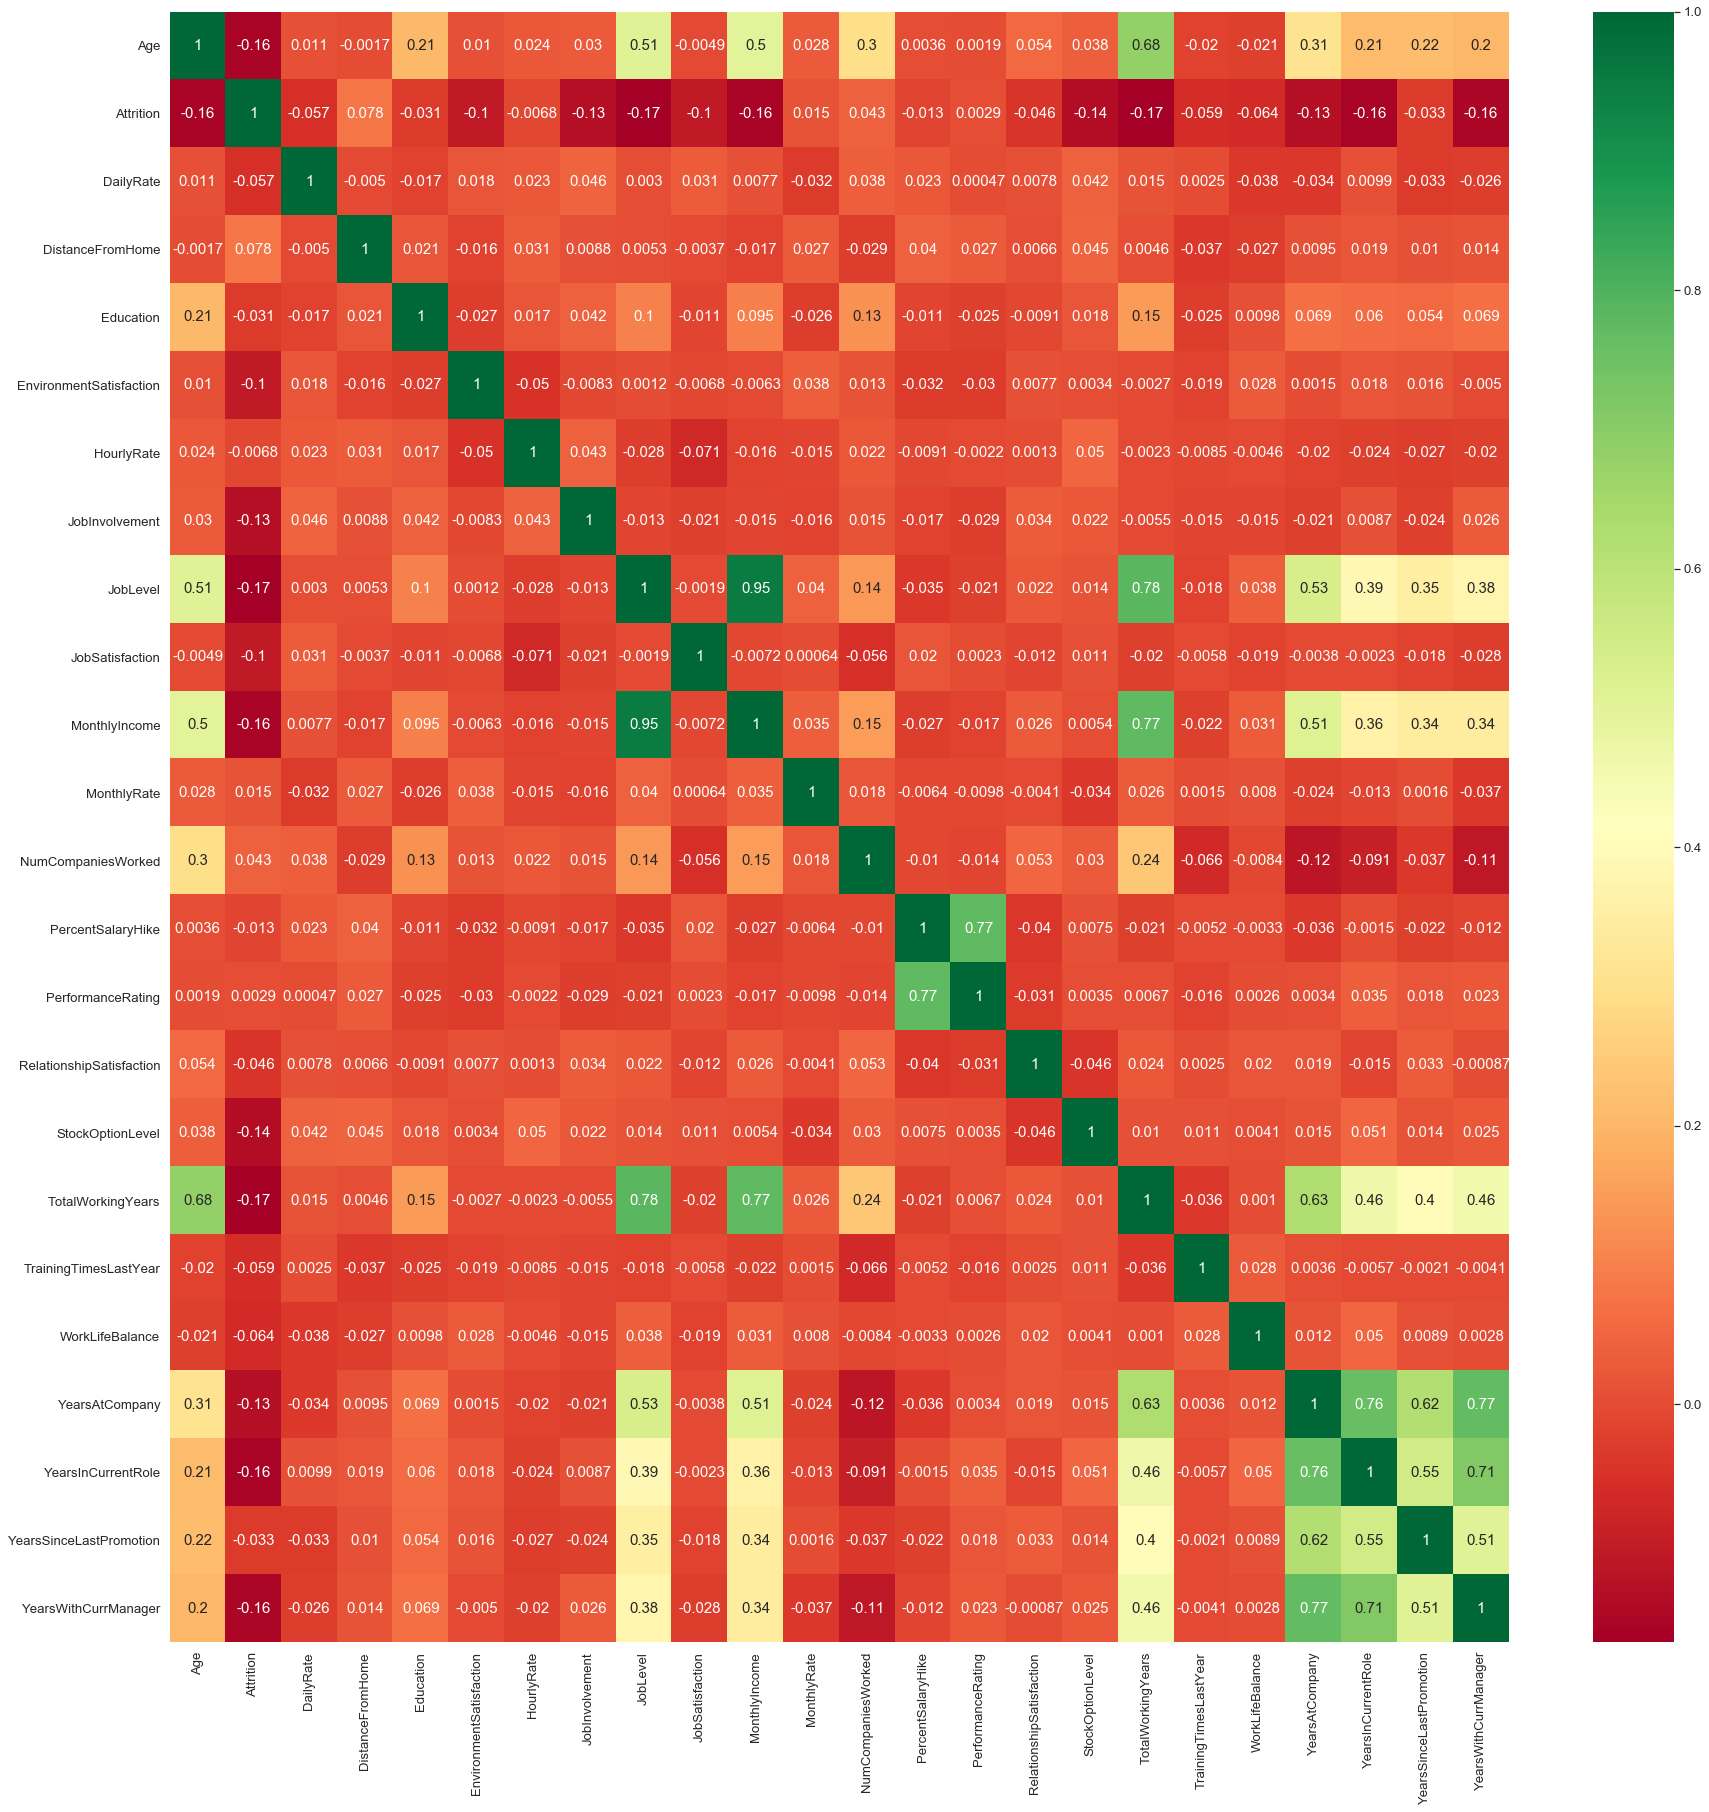

In [14]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Feature Engineering:
Machine Learning model requires input data in numerical notations to extract patterns from it and make predictions. But, not all the data provided in our source dataset is numerical. the data provided in object column is Categorical data. we need to convert these into numerical notations. Here data is nothing but a feature that our model uses as an input. So, we perform Feature Engineering on our data to create meaningful numerical data out of the source dataset.

In [15]:
categorical_col.remove('Attrition')

In [16]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

# Model Selection:
There are around 60+ predictive modeling algorithms that are available to choose from. We must have a good understanding of our data and the desired solution we are looking for, to narrow down our model selection. Here our goal is to predict the attration by developing a supervised machine learning model and we want to identify a relation between our output and remaining independent features . This scenario is a classic example of classification.

We are provided with 1470 rows of the labeled dataset tagged with the output column “Attrition” to train our model. Whenever the dataset is labeled and output feature is known, we opt for the Supervised Learning Machine Learning technique. So, our use-case is a Supervised Learning plus Classification problem. Based on these criteria we can narrow down our choice of models to a few:

Logistic Regression

SVC()

DecisionTreeRegressor()

KNeighborsClassifier


# Identifying features:
Here we are dividing our data into a dependent feature that is object as y and independent features as x.

In [22]:
x = df.drop('Attrition', axis=1)
y = df.Attrition

# Splitting Data:
we split our data into a test set and train set using train_test_split() which helps to better train the model and test its performance. test_size=0.15 creates a test data set with 10% of the data we have and the remaining 90% percent will be our training set to train our model. This split function returns us a pair of the train set (x_train,y_train) and a pair of the test set (x_test,y_test).

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=44)

In [93]:
model = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=7)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('accuaracy score of',accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.8639455782312925
[[127   0]
 [ 20   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       127
           1       0.00      0.00      0.00        20

    accuracy                           0.86       147
   macro avg       0.43      0.50      0.46       147
weighted avg       0.75      0.86      0.80       147



accuaracy score of 0.8639455782312925
[[127   0]
 [ 20   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       127
           1       0.00      0.00      0.00        20

    accuracy                           0.86       147
   macro avg       0.43      0.50      0.46       147
weighted avg       0.75      0.86      0.80       147



accuaracy score of 0.8027210884353742
[[108  19]
 [ 10  10]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       127
           1       0.34      0.50      0.41       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuaracy score of 0.8571428571428571
[[124   3]
 [ 18   2]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       127
           1       0.40      0.10      0.16        20

    accuracy                           0.86       147
   macro avg       0.64      0.54      0.54       147
weighted avg       0.81      0.86      0.82       147





# we can observe that Random Forest Regressor algorithem worked very well.
Accuracy score of both algorithems are as given:-

Accuracy score of LogisticRegression() is 86%

Accuracy score of SVC() is 86%

Accuracy score of DecisionTreeClassifier() is 80%

Accuracy score of KNeighborsClassifier is 85%

Hence we can say that out all algorithems DecisionTreeClassifier() is best for this problem till now however we will use cross validation to select best model.

# Model Validation¶

In [94]:
clf = DecisionTreeClassifier(random_state=44)

scores = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
scores

array([0.78911565, 0.78231293, 0.80272109, 0.76870748, 0.76530612])

In [95]:
x_train.shape

(1323, 30)

# Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [96]:

#specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 29))}]


#grid search
#specify model
lm = DecisionTreeClassifier(random_state=44)
lm.fit(x_train, y_train)
rfe = RFE(lm)             

#call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,param_grid = hyper_params,scoring= 'accuracy',cv = 5,verbose = 1,return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   41.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                            class_weight=None,
                                                            criterion='gini',
                                                            max_depth=None,
                                                            max_features=None,
                                                            max_leaf_nodes=None,
                                                            min_impurity_decrease=0.0,
                                                            min_impurity_split=None,
                                                            min_samples_leaf=1,
                                                            min_samples_split=2,
                                                            min_weight_fraction_leaf=0.0,
                                                            presort='depr

In [97]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.463805,0.068025,0.002254,0.001890,1,{'n_features_to_select': 1},0.754717,0.735849,0.762264,0.761364,...,0.752839,0.009610,22,0.918715,0.980151,0.993384,0.97356,0.925401,0.958242,0.0303
1,0.408559,0.015945,0.001607,0.001968,2,{'n_features_to_select': 2},0.788679,0.739623,0.777358,0.738636,...,0.754314,0.024103,20,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
2,0.459809,0.080430,0.002815,0.001610,3,{'n_features_to_select': 3},0.754717,0.713208,0.739623,0.693182,...,0.723328,0.021527,28,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
3,0.395908,0.013702,0.001151,0.001577,4,{'n_features_to_select': 4},0.732075,0.728302,0.773585,0.719697,...,0.737702,0.018654,26,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
4,0.384375,0.012612,0.001852,0.001888,5,{'n_features_to_select': 5},0.720755,0.716981,0.701887,0.715909,...,0.724137,0.021483,27,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
5,0.431279,0.103454,0.002265,0.002084,6,{'n_features_to_select': 6},0.732075,0.781132,0.766038,0.746212,...,0.755091,0.016926,19,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
6,0.367247,0.012909,0.001199,0.001599,7,{'n_features_to_select': 7},0.773585,0.713208,0.754717,0.727273,...,0.744514,0.021506,25,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
7,0.358738,0.012570,0.003673,0.000642,8,{'n_features_to_select': 8},0.781132,0.716981,0.728302,0.772727,...,0.746041,0.025796,24,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
8,0.396695,0.075506,0.003960,0.001082,9,{'n_features_to_select': 9},0.792453,0.709434,0.739623,0.791667,...,0.752847,0.033496,21,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000
9,0.332032,0.010418,0.001607,0.001968,10,{'n_features_to_select': 10},0.773585,0.773585,0.743396,0.772727,...,0.757356,0.020519,17,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0000


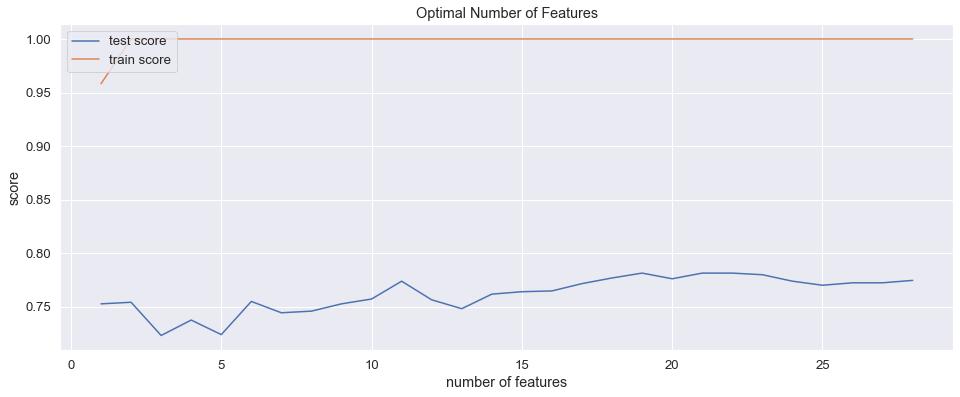

In [98]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [99]:
# final model
n_features_optimal = 20

lm =  DecisionTreeClassifier()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
score = accuracy_score(y_test,y_pred)
print(score)

0.8163265306122449


# Save the model using Pickle¶

In [100]:
# Save the model using pickle
import pickle

filename = "pickleDTCfile.pkl"
pickle.dump(rfe, open(filename, 'wb'))


# Conclusion:
we achieved highest accuracy score of 81% by using DecisionTreeClassifier which is good for any machine learning prediction model particularly for a linear regression problem. Finally! we successfully created a Regression Machine Learning prediction model using Python and its powerful libraries which predicts the Attrition of employee.